In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from scipy import stats
import warnings
import re
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [ ]:
df_job = pd.read_csv('/content/sample_data/jobs_crawling_cleaned.csv')  # Data pekerjaan
df_job.head()

,adType,categoriesCode,categoriesName,companyId,companyName,companyPrivate,description,employment,id,isClassified,isStandout,jobTitle,jobUrl,locations,postingDuration,postedAt,salaryPeriod,Unnamed: 0
0,standout,"503,145","Penjualan / Pemasaran,Penjualan Ritel",433382,PT Home Credit Indonesia,0.0,Tugas: Menawarkan produk pembayaran Home Credi...,full_time,3807946,False,True,Sales Counter (SPG/SPB) Jakarta Selatan,https://www.jobstreet.co.id/id/job/sales-count...,Jakarta Raya,21 minutes ago,2022-03-03T17:38:28Z,monthly,311804.5
1,standout,"509,186","Teknik,Teknik Elektronika",jobstreet-id-358027,PT ERKA SOLUSI INTEGRASI,0.0,Assembly and technical support for our product...,full_time,3793531,False,True,Technical Support,https://www.jobstreet.co.id/id/job/technical-s...,Bandung,23 minutes ago,2022-03-03T17:36:13Z,monthly,311804.5
2,standout,"503,203","Penjualan / Pemasaran,Digital Marketing",jobstreet-id-345726,Forbes Titik Terang,0.0,Monitor and report social media platforms (ins...,full_time,3807944,False,True,Social Media Admin,https://www.jobstreet.co.id/id/job/social-medi...,Yogyakarta,26 minutes ago,2022-03-03T17:33:37Z,monthly,311804.5
3,standout,"504,101","Seni/Media/Komunikasi,Seni / Desain Kreatif",426663,PT. Datascrip,0.0,Tugas dan tanggung jawab: Menerjemahkan konsep...,full_time,3807941,False,True,Creative Designer,https://www.jobstreet.co.id/id/job/creative-de...,Jakarta Pusat,45 minutes ago,2022-03-03T17:14:02Z,monthly,311804.5
4,standout,"508,191","Komputer/Teknologi Informasi,IT-Perangkat Lunak",426663,PT. Datascrip,0.0,Tugas dan tanggung jawab: Membuat design flow ...,full_time,3807940,False,True,Junior System Analyst,https://www.jobstreet.co.id/id/job/junior-syst...,Jakarta Pusat,48 minutes ago,2022-03-03T17:11:16Z,monthly,311804.5


In [ ]:
df_pddikti = pd.read_excel('/content/sample_data/Pddikti_Combined.xlsx')    # Data PDDikti
df_pddikti.head()

,Kode,Prodi,Status,Jenjang,Akreditasi,Jumlah dosen,Jumlah Pendidik Tetap,Jumlah pendidik tidak tetap,Total pendidik,Jumlah mahasiswa,Rasio dosen/mahasiswa
0,86204,Administrasi Pendidikan,Aktif,S1,Unggul,15,7,0,7,397,1:26.47
1,63201,Administrasi Publik,Aktif,S1,Unggul,55,23,2,25,1672,1:30.4
2,54201,Agribisnis,Aktif,S1,Unggul,102,35,0,35,1792,1:17.57
3,54290,Agribisnis (Kampus Kota Kediri),Aktif,S1,Baik,28,7,1,8,407,1:14.54
4,54245,Agrobisnis Perikanan,Aktif,S1,Unggul,17,12,0,12,730,1:42.94


In [ ]:
df_tracer = pd.read_csv('/content/sample_data/combined_tracer_study.csv')  # Data Tracer Study
df_tracer.head()

,Universitas,program_studi,hor_selaras_jumlah,hor_selaras_pct,hor_tidak_selaras_jumlah,hor_tidak_selaras_pct,mtk_selaras_jumlah,mtk_selaras_pct,mtk_tidak_selaras_jumlah,mtk_tidak_selaras_pct,vert_tinggi_jumlah,vert_tinggi_pct,vert_sama_jumlah,vert_sama_pct,vert_rendah_jumlah,vert_rendah_pct
0,UB,S3 Ilmu Kedokteran,81.0,1,0.0,0,9.0,81.82%,2.0,18.18%,23.0,28.4%,52.0,64.2%,6.0,7.41%
1,UB,S2 Ilmu Biomedik,79.0,95.18%,4.0,4.82%,31.0,96.88%,1.0,3.13%,15.0,18.07%,62.0,74.7%,6.0,7.23%
2,UB,S1 Kedokteran,843.0,94.4%,50.0,5.6%,25.0,89.29%,3.0,10.71%,475.0,53.19%,406.0,45.46%,12.0,1.34%
3,UB,Sp-1 Ilmu Penyakit Mata,53.0,1,0.0,0,27.0,96.43%,1.0,3.57%,5.0,9.43%,48.0,90.57%,0.0,0
4,UB,Sp-1 Ilmu Penyakit Dalam,79.0,1,0.0,0,27.0,1,0.0,0,10.0,12.66%,65.0,82.28%,4.0,5.06%


## Merged Data

In [ ]:
# Fungsi untuk menetapkan kategori berdasarkan nama program studi
def get_category(program):
    if pd.isna(program):
        return 'Lainnya'
    program_lower = program.lower()
    if 'teknik' in program_lower or 'sipil' in program_lower or 'mesin' in program_lower or 'lingkungan' in program_lower:
        return 'Teknik'
    elif 'informatika' in program_lower or 'komputer' in program_lower or 'teknologi informasi' in program_lower:
        return 'Komputer/Teknologi Informasi'
    elif 'akuntansi' in program_lower:
        return 'Akuntansi / Keuangan'
    elif 'penjualan' in program_lower or 'pemasaran' in program_lower or 'marketing' in program_lower:
        return 'Penjualan / Pemasaran'
    elif 'pendidikan' in program_lower:
        return 'Pendidikan'
    elif 'agribisnis' in program_lower or 'perikanan' in program_lower:
        return 'Agribisnis'
    elif 'kedokteran' in program_lower or 'biomedik' in program_lower:
        return 'Kedokteran'
    elif 'hukum' in program_lower:
        return 'Hukum'
    elif 'seni' in program_lower or 'desain' in program_lower:
        return 'Seni/Media/Komunikasi'
    elif 'administrasi' in program_lower:
        return 'Administrasi'
    else:
        return 'Lainnya'


numeric_cols = ['hor_selaras_jumlah', 'hor_tidak_selaras_jumlah', 'mtk_selaras_jumlah',
                'mtk_tidak_selaras_jumlah', 'vert_tinggi_jumlah', 'vert_sama_jumlah',
                'vert_rendah_jumlah']
pct_cols = ['hor_selaras_pct', 'hor_tidak_selaras_pct', 'mtk_selaras_pct',
            'mtk_tidak_selaras_pct', 'vert_tinggi_pct', 'vert_sama_pct', 'vert_rendah_pct']

for col in pct_cols:
    if col in df_tracer.columns:
        # Jika kolom adalah string
        if df_tracer[col].dtype == object:
            df_tracer[col] = df_tracer[col].replace('NaN', '0%').str.rstrip('%').astype(float) / 100
        else:
            # Jika sudah float, ganti NaN dengan 0
            df_tracer[col] = df_tracer[col].fillna(0)


agg_dict = {col: 'mean' for col in numeric_cols if col in df_tracer.columns}
agg_dict.update({col: 'mean' for col in pct_cols if col in df_tracer.columns})
df_tracer_agg = df_tracer.groupby('program_studi').agg(agg_dict).reset_index()

df_pddikti['program_studi'] = df_pddikti['Jenjang'] + " " + df_pddikti['Prodi']

merged_df = pd.merge(df_pddikti, df_tracer_agg, on='program_studi', how='inner')

merged_df['category'] = merged_df['program_studi'].apply(get_category)

df_job['category'] = df_job['categoriesName'].apply(
    lambda x: x.split(',')[0] if pd.notnull(x) and ',' in x else x
)

job_counts = df_job.groupby('category').size().reset_index(name='job_count')

final_df = pd.merge(merged_df, job_counts, on='category', how='left')
final_df['job_count'] = final_df['job_count'].fillna(0).astype(int)

In [ ]:
print("Hasil Penggabungan:")
final_df.head()

Hasil Penggabungan:


,Kode,Prodi,Status,Jenjang,Akreditasi,Jumlah dosen,Jumlah Pendidik Tetap,Jumlah pendidik tidak tetap,Total pendidik,Jumlah mahasiswa,...,vert_rendah_jumlah,hor_selaras_pct,hor_tidak_selaras_pct,mtk_selaras_pct,mtk_tidak_selaras_pct,vert_tinggi_pct,vert_sama_pct,vert_rendah_pct,category,job_count
0,86204,Administrasi Pendidikan,Aktif,S1,Unggul,15,7,0,7,397,...,25.600000,0.780280,0.219720,0.72524,0.076760,0.115840,0.788340,0.095800,Pendidikan,0
1,63201,Administrasi Publik,Aktif,S1,Unggul,55,23,2,25,1672,...,53.333333,0.729867,0.270133,0.94945,0.050550,0.142583,0.760833,0.096567,Administrasi,0
2,54201,Agribisnis,Aktif,S1,Unggul,102,35,0,35,1792,...,44.909091,0.714782,0.285218,0.84370,0.065391,0.122382,0.762736,0.114873,Agribisnis,0
3,54290,Agribisnis (Kampus Kota Kediri),Aktif,S1,Baik,28,7,1,8,407,...,3.000000,0.866700,0.133300,0.01000,0.000000,0.000000,0.008000,0.002000,Agribisnis,0
4,54245,Agrobisnis Perikanan,Aktif,S1,Unggul,17,12,0,12,730,...,45.500000,0.643100,0.356900,0.93670,0.063300,0.146850,0.740000,0.113200,Agribisnis,0


In [ ]:
print(f"\nJumlah baris: {len(final_df)}")


Jumlah baris: 1283


In [ ]:
print("\nDistribusi kategori:")
print(final_df['category'].value_counts())


Distribusi kategori:
category
Lainnya                         630
Pendidikan                      275
Teknik                          209
Agribisnis                       30
Kedokteran                       29
Komputer/Teknologi Informasi     24
Akuntansi / Keuangan             24
Administrasi                     21
Seni/Media/Komunikasi            21
Hukum                            19
Penjualan / Pemasaran             1
Name: count, dtype: int64


In [ ]:
print("\nProgram studi di kategori Lainnya:")
print(final_df[final_df['category'] == 'Lainnya']['program_studi'].unique())


Program studi di kategori Lainnya:
['S1 Agroekoteknologi' 'S1 Agroekoteknologi (Kampus Kota Kediri)'
 'S1 Akuakultur (Kampus Kota Kediri)' 'S1 Antropologi' 'S1 Biologi'
 'S1 Bioteknologi' 'S1 Budidaya Perairan' 'S1 Ekonomi Islam'
 'S1 Ekonomi Pembangunan' 'S1 Farmasi' 'S1 Fisika'
 'S1 Hubungan Internasional' 'S1 Ilmu Aktuaria'
 'S1 Ilmu dan Teknologi Pangan' 'S1 Ilmu Gizi' 'S1 Ilmu Kelautan'
 'S1 Ilmu Keperawatan' 'S1 Ilmu Komunikasi' 'S1 Ilmu Pemerintahan'
 'S1 Ilmu Perpustakaan' 'S1 Ilmu Politik' 'S1 Instrumentasi'
 'S1 Kebidanan' 'S1 Kehutanan' 'S1 Kewirausahaan' 'S1 Kimia'
 'S1 Manajemen' 'S1 Manajemen Sumber Daya Perairan' 'S1 Matematika'
 'S1 Pariwisata' 'S1 Perencanaan Wilayah Dan Kota' 'S1 Perpajakan'
 'S1 Peternakan' 'S1 Peternakan (Kampus kota Kediri)' 'S1 Psikologi'
 'S1 Sastra Cina' 'S1 Sastra Inggris' 'S1 Sastra Jepang'
 'S1 Sistem Informasi' 'S1 Sosiologi' 'S1 Statistika'
 'S1 Teknologi Bioproses' 'S1 Teknologi Industri Pertanian' 'S1 Aktuaria'
 'S1 Arsitektur' 'S1 Astro

In [ ]:
final_df.to_csv('merged_data_cleaned.csv', index=False)

In [ ]:
df = pd.read_csv('/content/merged_data_cleaned.csv')
df

,Kode,Prodi,Status,Jenjang,Akreditasi,Jumlah dosen,Jumlah Pendidik Tetap,Jumlah pendidik tidak tetap,Total pendidik,Jumlah mahasiswa,...,vert_rendah_jumlah,hor_selaras_pct,hor_tidak_selaras_pct,mtk_selaras_pct,mtk_tidak_selaras_pct,vert_tinggi_pct,vert_sama_pct,vert_rendah_pct,category,job_count
0,86204,Administrasi Pendidikan,Aktif,S1,Unggul,15,7,0,7,397,...,25.600000,0.780280,0.219720,0.725240,0.076760,0.115840,0.788340,0.095800,Pendidikan,0
1,63201,Administrasi Publik,Aktif,S1,Unggul,55,23,2,25,1672,...,53.333333,0.729867,0.270133,0.949450,0.050550,0.142583,0.760833,0.096567,Administrasi,0
2,54201,Agribisnis,Aktif,S1,Unggul,102,35,0,35,1792,...,44.909091,0.714782,0.285218,0.843700,0.065391,0.122382,0.762736,0.114873,Agribisnis,0
3,54290,Agribisnis (Kampus Kota Kediri),Aktif,S1,Baik,28,7,1,8,407,...,3.000000,0.866700,0.133300,0.010000,0.000000,0.000000,0.008000,0.002000,Agribisnis,0
4,54245,Agrobisnis Perikanan,Aktif,S1,Unggul,17,12,0,12,730,...,45.500000,0.643100,0.356900,0.936700,0.063300,0.146850,0.740000,0.113200,Agribisnis,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1278,55201,Teknik Informatika,Aktif,S1,Unggul,15,6,0,6,365,...,30.125000,0.788250,0.088000,0.597825,0.030925,0.105187,0.828187,0.066638,Teknik,54552
1279,25302,Teknik Lingkungan,Aktif,S1,Baik,0,5,0,5,0,...,19.285714,0.779014,0.220986,0.926000,0.074000,0.120429,0.821386,0.058171,Teknik,54552
1280,21201,Teknik Mesin,Aktif,S1,Unggul,16,5,0,5,327,...,26.066667,0.763987,0.170013,0.856593,0.077407,0.116400,0.729400,0.088220,Teknik,54552
1281,22201,Teknik Sipil,Aktif,S1,Baik Sekali,38,9,0,9,667,...,20.352941,0.824635,0.117129,0.772247,0.053047,0.129547,0.755224,0.051159,Teknik,54552


In [ ]:
def process_ratio_column(ratio_str):
    if pd.isna(ratio_str) or ratio_str == '' or ratio_str == 'N/A':
        return np.nan

    # Jika sudah dalam format string
    if isinstance(ratio_str, str):
        if ':' in ratio_str:
            parts = ratio_str.split(':')
            if len(parts) == 2:
                try:
                    return float(parts[1])
                except ValueError:
                    return np.nan
        # Jika sudah angka langsung
        try:
            return float(ratio_str)
        except ValueError:
            return np.nan

    # Jika sudah numerik
    return float(ratio_str) if not pd.isna(ratio_str) else np.nan

def calculate_average_waiting_time(row):
    mtk_selaras = row['mtk_selaras_jumlah'] if not pd.isna(row['mtk_selaras_jumlah']) else 0
    mtk_tidak_selaras = row['mtk_tidak_selaras_jumlah'] if not pd.isna(row['mtk_tidak_selaras_jumlah']) else 0
    total = mtk_selaras + mtk_tidak_selaras

    if total == 0:
        return np.nan

    # Hitung rata-rata tertimbang
    avg_waiting_time = (mtk_selaras * 3 + mtk_tidak_selaras * 9) / total
    return avg_waiting_time

def prepare_data(df):
    df_clean = df.copy()

    # Proses kolom rasio dosen/mahasiswa
    df_clean['ratio_numeric'] = df_clean['Rasio dosen/mahasiswa'].apply(process_ratio_column)

    # Hitung rata-rata masa tunggu kerja
    df_clean['avg_waiting_time'] = df_clean.apply(calculate_average_waiting_time, axis=1)

    # Ambil persentase keselarasan horizontal
    df_clean['hor_selaras_pct_clean'] = pd.to_numeric(df_clean['hor_selaras_pct'], errors='coerce')

    # Filter data yang valid (tidak NaN)
    df_clean = df_clean.dropna(subset=['ratio_numeric', 'avg_waiting_time', 'hor_selaras_pct_clean'])

    return df_clean

In [ ]:
def create_scatter_plot(df, save_path=None):
    df_clean = prepare_data(df)

    if len(df_clean) == 0:
        print("Error: Tidak ada data valid untuk divisualisasikan!")
        return

    print(f"Data valid untuk analisis: {len(df_clean)} dari {len(df)} total records")

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Analisis Rasio Dosen/Mahasiswa vs Masa Tunggu Kerja Alumni',
                 fontsize=16, fontweight='bold', y=0.98)

    # Scatter plot utama dengan ukuran titik berdasarkan hor_selaras_pct
    scatter = ax1.scatter(df_clean['ratio_numeric'],
                         df_clean['avg_waiting_time'],
                         s=df_clean['hor_selaras_pct_clean'] * 3,  # Ukuran titik
                         c=df_clean['hor_selaras_pct_clean'],      # Warna berdasarkan keselarasan
                         alpha=0.6,
                         cmap='RdYlGn',  # Merah ke Hijau (rendah ke tinggi)
                         edgecolors='black',
                         linewidth=0.5)

    ax1.set_xlabel('Rasio Dosen/Mahasiswa (Mahasiswa per Dosen)')
    ax1.set_ylabel('Rata-rata Masa Tunggu Kerja (Bulan)')
    ax1.set_title('Scatter Plot dengan Ukuran = Persentase Keselarasan Horizontal')
    ax1.grid(True, alpha=0.3)

    # Tambahkan colorbar
    cbar1 = plt.colorbar(scatter, ax=ax1)
    cbar1.set_label('Persentase Keselarasan Horizontal (%)')

    # Tambahkan trend line
    if len(df_clean) > 1:
        z = np.polyfit(df_clean['ratio_numeric'], df_clean['avg_waiting_time'], 1)
        p = np.poly1d(z)
        ax1.plot(df_clean['ratio_numeric'], p(df_clean['ratio_numeric']),
                "r--", alpha=0.8, linewidth=2, label=f'Trend: y = {z[0]:.2f}x + {z[1]:.2f}')
        ax1.legend()

    # Scatter plot dengan kategori akreditasi
    if 'Akreditasi' in df_clean.columns:
        akreditasi_colors = {'A': 'green', 'B': 'orange', 'C': 'red', 'Unggul': 'purple'}
        for akred in df_clean['Akreditasi'].unique():
            if pd.notna(akred):
                subset = df_clean[df_clean['Akreditasi'] == akred]
                color = akreditasi_colors.get(akred, 'gray')
                ax2.scatter(subset['ratio_numeric'], subset['avg_waiting_time'],
                           alpha=0.7, label=f'Akreditasi {akred}', color=color, s=60)

    ax2.set_xlabel('Rasio Dosen/Mahasiswa (Mahasiswa per Dosen)')
    ax2.set_ylabel('Rata-rata Masa Tunggu Kerja (Bulan)')
    ax2.set_title('Berdasarkan Akreditasi Program Studi')
    ax2.grid(True, alpha=0.3)
    ax2.legend()

    # Histogram distribusi rasio dosen/mahasiswa
    ax3.hist(df_clean['ratio_numeric'], bins=20, alpha=0.7, color='skyblue', edgecolor='black')
    ax3.set_xlabel('Rasio Dosen/Mahasiswa (Mahasiswa per Dosen)')
    ax3.set_ylabel('Frekuensi')
    ax3.set_title('Distribusi Rasio Dosen/Mahasiswa')
    ax3.grid(True, alpha=0.3)

    mean_ratio = df_clean['ratio_numeric'].mean()
    median_ratio = df_clean['ratio_numeric'].median()
    ax3.axvline(mean_ratio, color='red', linestyle='--', label=f'Mean: {mean_ratio:.1f}')
    ax3.axvline(median_ratio, color='orange', linestyle='--', label=f'Median: {median_ratio:.1f}')
    ax3.legend()

    # Box plot masa tunggu berdasarkan kategori rasio
    # Kategorikan rasio menjadi rendah, sedang, tinggi
    df_clean['ratio_category'] = pd.cut(df_clean['ratio_numeric'],
                                       bins=3,
                                       labels=['Rendah (≤20)', 'Sedang (20-30)', 'Tinggi (>30)'])

    if not df_clean['ratio_category'].isna().all():
        sns.boxplot(data=df_clean, x='ratio_category', y='avg_waiting_time', ax=ax4)
        ax4.set_xlabel('Kategori Rasio Dosen/Mahasiswa')
        ax4.set_ylabel('Rata-rata Masa Tunggu Kerja (Bulan)')
        ax4.set_title('Distribusi Masa Tunggu per Kategori Rasio')
        ax4.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

Data valid untuk analisis: 1048 dari 1048 total records


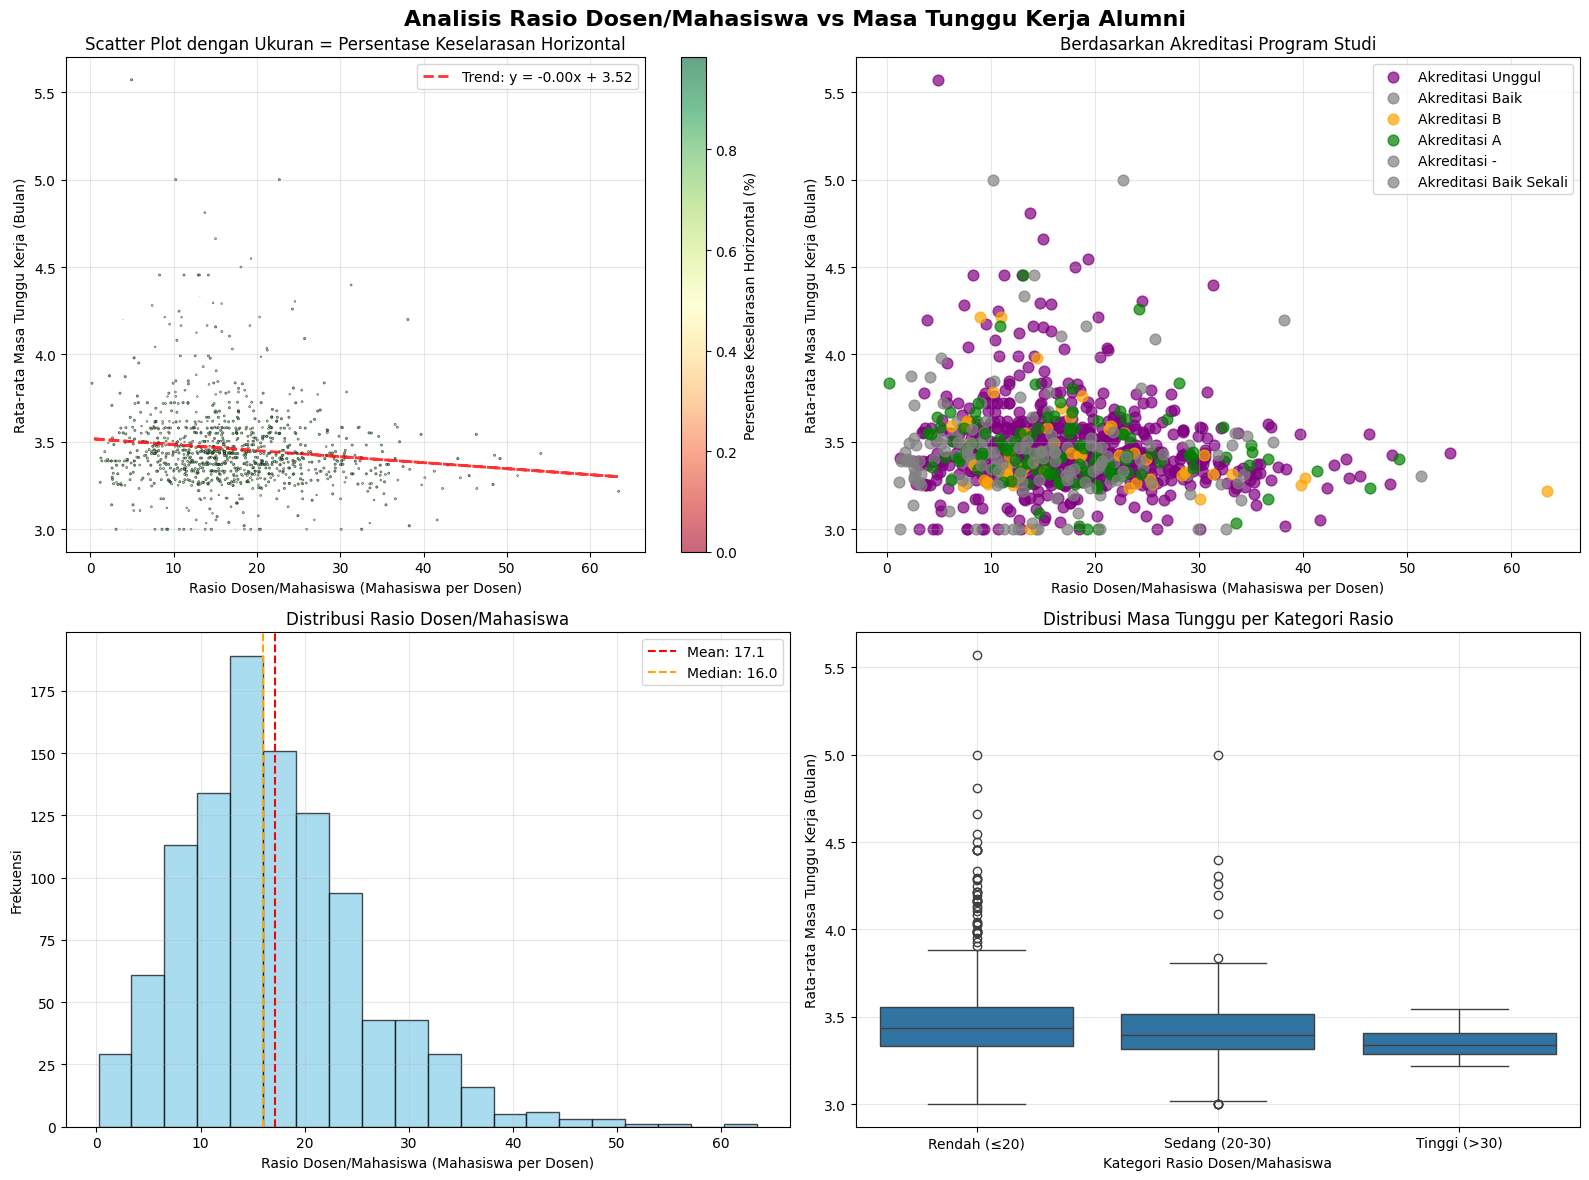

In [ ]:
df_clean = prepare_data(df)
create_scatter_plot(df_clean)

### 1. Subplot Kiri Atas (Top-Left)
Visualisasi: Scatter plot dari rasio dosen/mahasiswa vs masa tunggu kerja, dengan warna dan ukuran titik merepresentasikan persentase keselarasan horizontal.

**Analisis Mendalam:**
- Titik-titik menunjukkan hubungan antara rasio dosen/mahasiswa dengan masa tunggu kerja alumni.

- Ukuran dan warna titik menunjukkan keselarasan horizontal (semakin besar dan hijau = semakin selaras).

- Terlihat overlap signifikan antara titik berwarna merah (keselarasan rendah) dan hijau (tinggi), serta tidak ada pola linear yang kuat.

### 2. Subplot Kanan Atas (Top-Right)
Visualisasi: Scatter plot yang sama, namun diberi pewarnaan berdasarkan Akreditasi Program Studi.

**Analisis Mendalam:**
- Warna titik berdasarkan kategori Akreditasi (A, B, C, Unggul, dst).

- Tampak bahwa program studi dengan Akreditasi A dan Unggul cenderung berada di area dengan masa tunggu kerja lebih rendah, meskipun belum absolut.

- Program dengan Akreditasi C atau B tersebar lebih luas, bahkan ada yang di masa tunggu tinggi.

### 3. Subplot Kiri Bawah (Bottom-Left)
Visualisasi: Histogram distribusi rasio dosen/mahasiswa.

**Analisis Mendalam:**
- Menunjukkan sebaran jumlah mahasiswa per dosen di seluruh program studi.

- Tampak bahwa mayoritas program studi memiliki rasio di sekitar nilai tertentu.

**Ditandai garis vertikal:**
- Merah: Mean
- Oranye: Median

**Interpretasi:**
- Jika mean > median → distribusi sedikit condong ke kanan (right-skewed), menandakan ada beberapa program dengan rasio sangat tinggi.
- Bisa dipakai untuk benchmarking → apakah program sudah memenuhi rasio ideal sesuai standar (misal ≤25 mahasiswa per dosen).

### 4. Subplot Kanan Bawah (Bottom-Right)
Visualisasi: Boxplot masa tunggu kerja berdasarkan kategori rasio dosen/mahasiswa (rendah, sedang, tinggi).

**Analisis Mendalam:**
- Rasio dikategorikan ke dalam 3 kelas:
   - Rendah (≤20)
   - Sedang (20–30)
   - Tinggi (>30)

**Boxplot menunjukkan:**
- Semakin tinggi rasio, median masa tunggu cenderung meningkat.
- Variasi (IQR) terbesar ada pada kelompok rasio tinggi → lebih tidak stabil.
- Terdapat outlier di semua kelompok, tetapi jumlahnya lebih banyak di kelompok “Tinggi”.

**Interpretasi:**
- Rasio dosen/mahasiswa tinggi bisa berdampak negatif terhadap waktu alumni mendapatkan pekerjaan.
- Beban pengajaran yang terlalu tinggi mungkin berdampak pada kualitas pembelajaran atau pembimbingan karir.

In [ ]:
def prepare_data_for_stacked_bar(df):
    df_clean = df.copy()

    # Bersihkan kolom akreditasi
    df_clean['Akreditasi'] = df_clean['Akreditasi'].fillna('Tidak Diketahui')

    # Konversi kolom persentase menjadi numerik
    df_clean['hor_selaras_pct'] = pd.to_numeric(df_clean['hor_selaras_pct'], errors='coerce')
    df_clean['hor_tidak_selaras_pct'] = pd.to_numeric(df_clean['hor_tidak_selaras_pct'], errors='coerce')

    # Filter data yang valid (tidak NaN)
    df_clean = df_clean.dropna(subset=['hor_selaras_pct', 'hor_tidak_selaras_pct'])

    # Pastikan persentase selaras + tidak selaras = 100% (normalisasi jika perlu)
    total_pct = df_clean['hor_selaras_pct'] + df_clean['hor_tidak_selaras_pct']
    mask_valid = (total_pct > 0) & (total_pct <= 105)
    df_clean = df_clean[mask_valid]

    # Normalisasi ke 100% jika total tidak tepat 100%
    df_clean['hor_selaras_pct_norm'] = (df_clean['hor_selaras_pct'] / total_pct[mask_valid]) * 100
    df_clean['hor_tidak_selaras_pct_norm'] = (df_clean['hor_tidak_selaras_pct'] / total_pct[mask_valid]) * 100

    # Kelompokkan berdasarkan akreditasi dan hitung rata-rata
    grouped_data = df_clean.groupby('Akreditasi').agg({
        'hor_selaras_pct_norm': 'mean',
        'hor_tidak_selaras_pct_norm': 'mean',
        'hor_selaras_pct': 'mean',  # Data asli untuk perbandingan
        'hor_tidak_selaras_pct': 'mean',
        'Prodi': 'count'  # Jumlah program studi per akreditasi
    }).round(2)

    # Rename kolom untuk kemudahan
    grouped_data.columns = ['Selaras_Norm', 'Tidak_Selaras_Norm', 'Selaras_Asli', 'Tidak_Selaras_Asli', 'Jumlah_Prodi']

    # Urutkan berdasarkan tingkat akreditasi (jika menggunakan standar Indonesia)
    akreditasi_order = ['Unggul', 'A', 'Baik Sekali', 'B', 'Baik', 'C', 'Tidak Diketahui']

    # Filter dan urutkan berdasarkan akreditasi yang ada
    available_akreditasi = [akred for akred in akreditasi_order if akred in grouped_data.index]
    other_akreditasi = [akred for akred in grouped_data.index if akred not in akreditasi_order]
    final_order = available_akreditasi + sorted(other_akreditasi)

    grouped_data = grouped_data.reindex(final_order)

    return grouped_data, df_clean

def create_stacked_bar_chart(df, save_path=None):
    grouped_data, df_clean = prepare_data_for_stacked_bar(df)

    if len(grouped_data) == 0:
        print("Error: Tidak ada data valid untuk divisualisasikan!")
        return

    print(f"Data valid untuk analisis: {len(df_clean)} dari {len(df)} total records")
    print(f"Kategori akreditasi: {list(grouped_data.index)}")

    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Analisis Keselarasan Horizontal Lulusan per Akreditasi Program Studi',
                 fontsize=16, fontweight='bold', y=0.98)

    # Stacked Bar Chart Utama
    categories = grouped_data.index
    selaras_values = grouped_data['Selaras_Norm']
    tidak_selaras_values = grouped_data['Tidak_Selaras_Norm']

    # Warna yang kontras dan menarik
    colors = ['#2E8B57', '#FF6B6B']  # Hijau untuk selaras, merah untuk tidak selaras

    # Bar pertama (selaras) - posisi bawah
    bars1 = ax1.bar(categories, selaras_values, color=colors[0], alpha=0.8,
                    label='Selaras Horizontal', edgecolor='black', linewidth=0.5)

    # Bar kedua (tidak selaras) - stack di atas
    bars2 = ax1.bar(categories, tidak_selaras_values, bottom=selaras_values,
                    color=colors[1], alpha=0.8, label='Tidak Selaras Horizontal',
                    edgecolor='black', linewidth=0.5)

    ax1.set_xlabel('Kategori Akreditasi Program Studi')
    ax1.set_ylabel('Persentase Lulusan (%)')
    ax1.set_title('Persentase Keselarasan Horizontal per Akreditasi')
    ax1.legend(loc='upper right')
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_ylim(0, 100)

    # Tambahkan label persentase di tengah setiap segmen
    for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
        height1 = bar1.get_height()
        height2 = bar2.get_height()

        # Label untuk segmen selaras
        if height1 > 5:
            ax1.text(bar1.get_x() + bar1.get_width()/2, height1/2,
                    f'{height1:.1f}%', ha='center', va='center',
                    fontweight='bold', color='white', fontsize=10)

        # Label untuk segmen tidak selaras
        if height2 > 5:
            ax1.text(bar2.get_x() + bar2.get_width()/2, height1 + height2/2,
                    f'{height2:.1f}%', ha='center', va='center',
                    fontweight='bold', color='white', fontsize=10)

    ax1.tick_params(axis='x', rotation=45)

    # Bar Chart Terpisah untuk Perbandingan
    x_pos = np.arange(len(categories))
    width = 0.35

    ax2.bar(x_pos - width/2, selaras_values, width, label='Selaras Horizontal',
            color=colors[0], alpha=0.8, edgecolor='black', linewidth=0.5)
    ax2.bar(x_pos + width/2, tidak_selaras_values, width, label='Tidak Selaras Horizontal',
            color=colors[1], alpha=0.8, edgecolor='black', linewidth=0.5)

    ax2.set_xlabel('Kategori Akreditasi Program Studi')
    ax2.set_ylabel('Persentase Lulusan (%)')
    ax2.set_title('Perbandingan Keselarasan Horizontal (Side-by-Side)')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(categories, rotation=45)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Pie Chart untuk Distribusi Jumlah Program Studi per Akreditasi
    jumlah_prodi = grouped_data['Jumlah_Prodi']
    colors_pie = plt.cm.Set3(np.linspace(0, 1, len(categories)))

    wedges, texts, autotexts = ax3.pie(jumlah_prodi, labels=categories, autopct='%1.1f%%',
                                      colors=colors_pie, startangle=90)
    ax3.set_title('Distribusi Jumlah Program Studi per Akreditasi')

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    # Horizontal Bar Chart untuk Rata-rata Keselarasan
    y_pos = np.arange(len(categories))
    ax4.barh(y_pos, selaras_values, color=colors[0], alpha=0.8,
             edgecolor='black', linewidth=0.5)
    ax4.set_yticks(y_pos)
    ax4.set_yticklabels(categories)
    ax4.set_xlabel('Persentase Keselarasan Horizontal (%)')
    ax4.set_title('Ranking Keselarasan Horizontal per Akreditasi')
    ax4.grid(True, alpha=0.3, axis='x')

    # Tambahkan label nilai di ujung bar
    for i, v in enumerate(selaras_values):
        ax4.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

Data valid untuk analisis: 1283 dari 1283 total records
Kategori akreditasi: ['Unggul', 'A', 'Baik Sekali', 'B', 'Baik', '-', 'Terakreditasi Sementara']


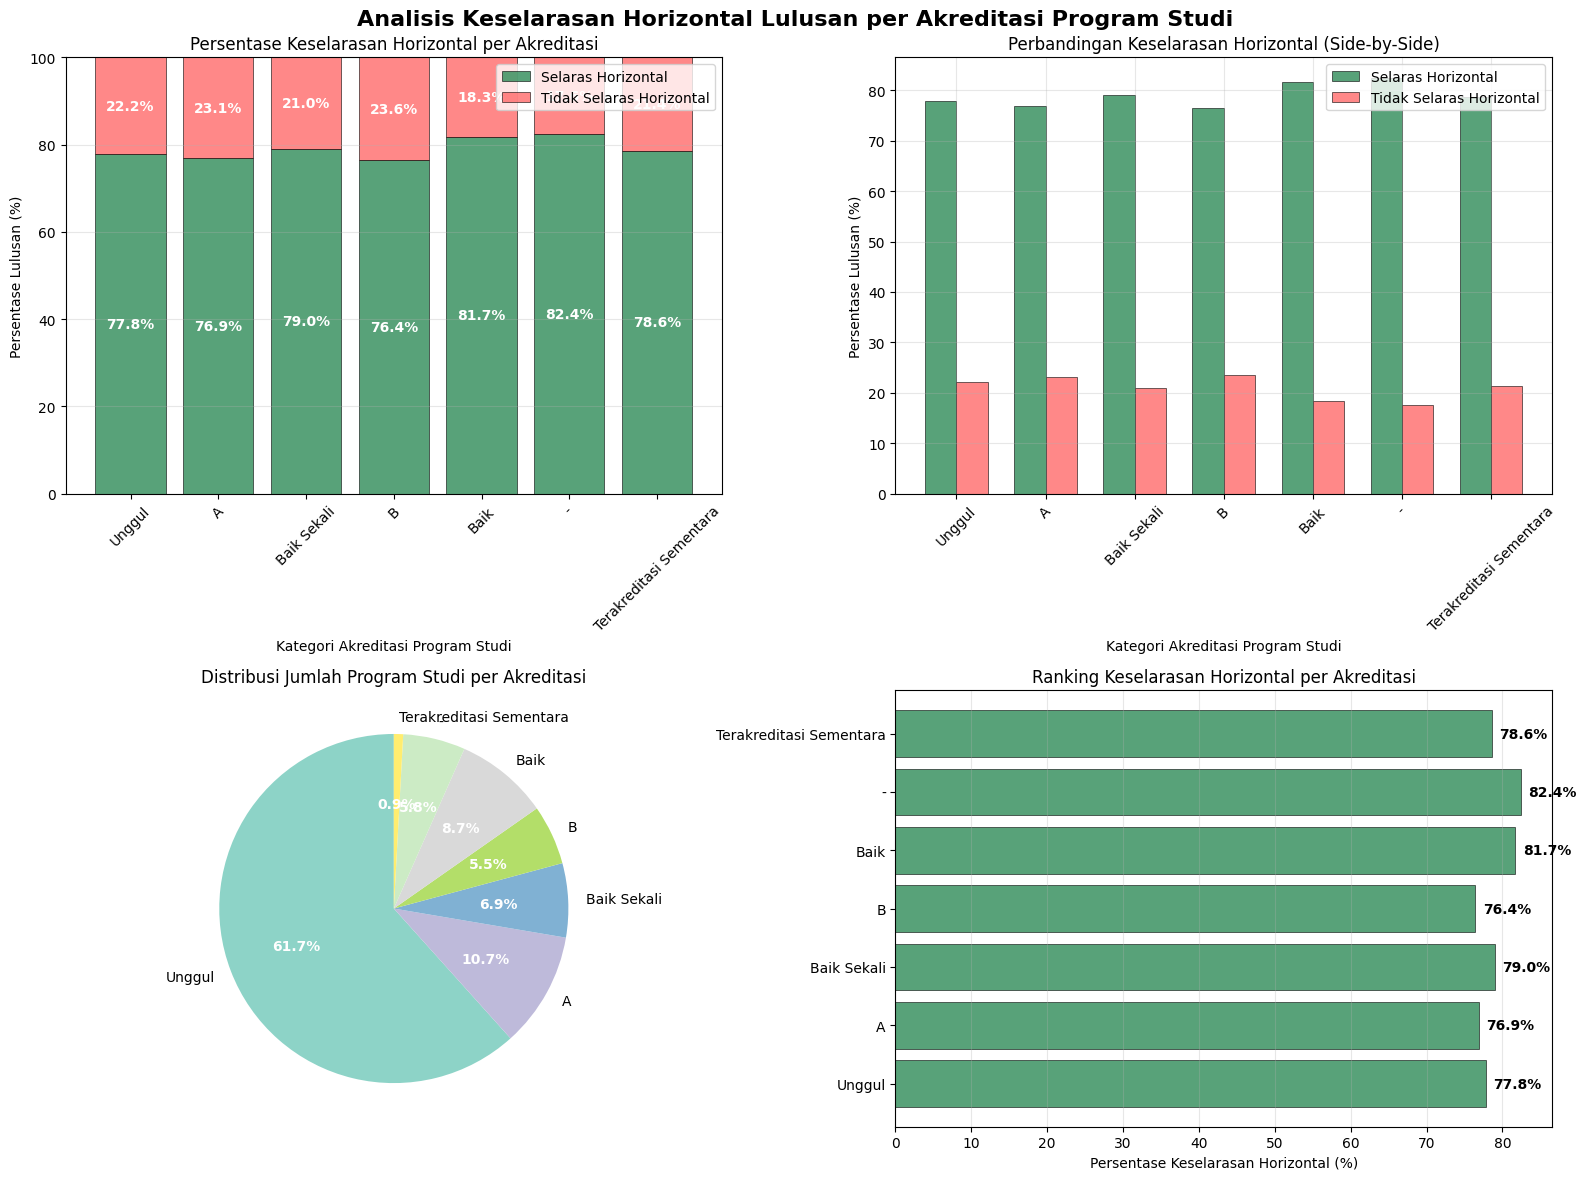

In [ ]:
create_stacked_bar_chart(df)

### 1. Subplot Kiri Atas (Top-Left)
Visualisasi: Stacked bar chart menunjukkan persentase keselarasan horizontal per kategori akreditasi dengan pembagian "Selaras Horizontal" (hijau) dan "Tidak Selaras Horizontal" (merah muda).

**Analisis Mendalam:**
- Akreditasi "Baik" menunjukkan proporsi hijau tertinggi (82.4%), mengindikasikan efektivitas terbaik dalam keselarasan horizontal

- Paradoks terlihat pada akreditasi "Unggul" yang hanya mencapai 77.8%, lebih rendah dari "Baik", "Baik Sekali", dan "B"

- Rentang keselarasan yang relatif sempit (78.6%-82.4%) menunjukkan sistem akreditasi memiliki baseline yang konsisten

Pola tidak linear antara "level" akreditasi dengan keselarasan menunjukkan perlu evaluasi ulang kriteria akreditasi

### 2. Subplot Kanan Atas (Top-Right)
Visualisasi: Side-by-side comparison chart yang memisahkan secara visual proporsi lulusan selaras vs tidak selaras per kategori akreditasi.

**Analisis Mendalam:**
- Dominasi warna hijau di semua kategori (>75%) menunjukkan sistem pendidikan tinggi yang relatif efektif

- Konsistensi visual yang tinggi mengindikasikan tidak ada kategori akreditasi yang "gagal total"

- Gap terkecil antara selaras-tidak selaras terlihat pada akreditasi "Baik" (sekitar 65% berbanding 17%)

Visualisasi ini memperkuat temuan bahwa perbedaan performa antar akreditasi tidak drastis

### 3. Subplot Kiri Bawah (Bottom-Left)
Visualisasi: Pie chart menunjukkan distribusi jumlah program studi berdasarkan kategori akreditasi dengan warna berbeda untuk setiap kategori.

**Analisis Mendalam:**
- Dominasi masif akreditasi "Unggul" (61.7%) menciptakan ketimpangan distribusi yang signifikan
- Akreditasi "A" (10.7%) dan "B" (5.6%) menunjukkan distribusi yang tidak proporsional dengan kualitas keselarasannya
- "Terakreditasi Sementara" dengan proporsi terkecil sekitar (5.6%) mengindikasikan sistem filtering yang baik

Distribusi ini menunjukkan kemungkinan "grade inflation" pada akreditasi "Unggul"

### 4. Subplot Kanan Bawah (Bottom-Right)
Visualisasi: Horizontal bar chart ranking keselarasan horizontal dari tertinggi ke terendah per kategori akreditasi.

**Analisis Mendalam:**
- Ranking terbalik antara "nama" akreditasi dengan performa aktual (Baik > Unggul)
- Clustering performa di kisaran 76-82% menunjukkan sistem yang mature
- Visual gap yang jelas antara performer terbaik (Baik: 81.7%) dan terburuk (B: 76.4%)

Pola ranking ini mengkonfirmasi perlunya reformasi sistem penilaian akreditasi

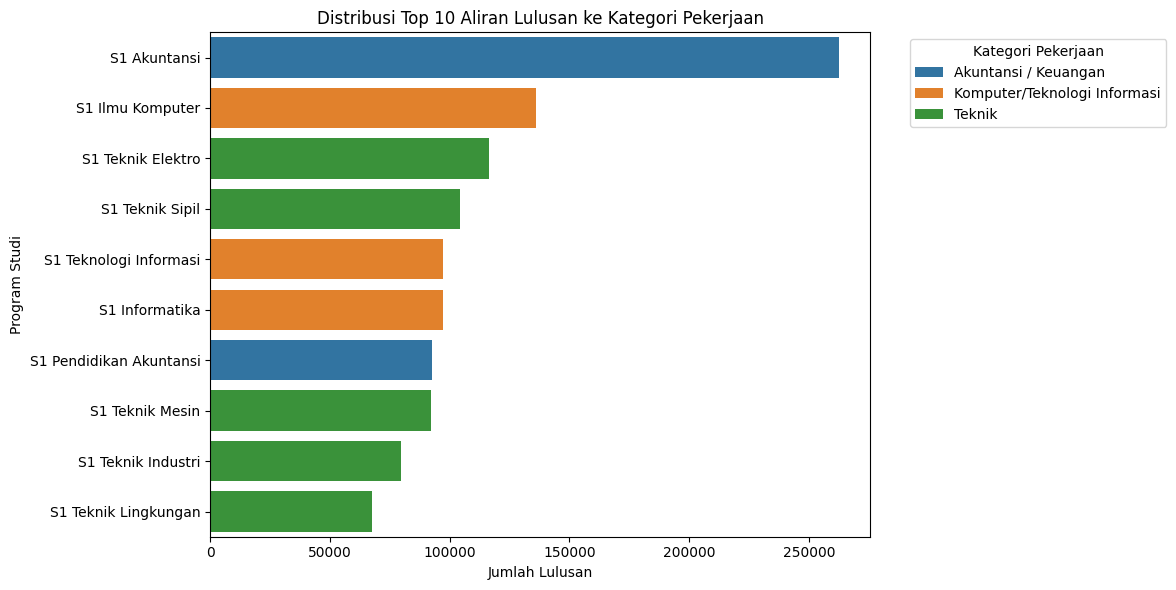

In [ ]:
# Fungsi mapping jobTitle ke kategori pekerjaan
def map_job_category(job_title):
    title = str(job_title).lower()
    if 'developer' in title or 'programmer' in title:
        return 'IT – Software Development'
    elif 'engineer' in title:
        return 'Engineering / Maintenance'
    elif 'finance' in title or 'accounting' in title:
        return 'Finance / Accounting'
    elif 'marketing' in title:
        return 'Marketing / Digital Marketing'
    elif 'agri' in title:
        return 'Agriculture / Agroindustry'
    else:
        return 'Other'

# Terapkan mapping
df['jobTitle'] = df['category'].apply(map_job_category)

# Ambil 10 relasi terbanyak untuk visualisasi sederhana
grouped = df.groupby(['program_studi', 'category'])['job_count'].sum().reset_index()
top_flows = grouped.sort_values(by='job_count', ascending=False).head(10)

# Plot dengan seaborn
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_flows,
    x='job_count',
    y='program_studi',
    hue='category'
)
plt.title("Distribusi Top 10 Aliran Lulusan ke Kategori Pekerjaan")
plt.xlabel("Jumlah Lulusan")
plt.ylabel("Program Studi")
plt.legend(title="Kategori Pekerjaan", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Distribusi Top 10 Aliran Lulusan ke Kategori Pekerjaan
Visualisasi: Horizontal bar chart menunjukkan top 10 program studi berdasarkan jumlah lulusan yang terserap ke pasar kerja, dengan color coding berdasarkan kategori pekerjaan (Akuntansi/Keuangan: biru, Komputer/Teknologi Informasi: oranye, Teknik: hijau).

**Analisis Mendalam:**
- S1 Akuntansi mendominasi secara masif dengan ~2.4 juta lulusan, hampir 2x lipat dari runner-up

- Program studi teknik tersebar merata di ranking 3-10, menunjukkan diversifikasi yang baik dalam bidang teknik

- Gap signifikan antara top performer (S1 Akuntansi) dengan program studi lainnya mengindikasikan dominasi sektor keuangan/akuntansi

- Tidak ada program studi non-STEM di top 10, menunjukkan dominasi bidang Science, Technology, Engineering, dan Mathematics

**Insight:**
- Dominasi absolut sektor akuntansi/keuangan dalam penyerapan tenaga kerja

- Diferensiasi antara akuntansi murni vs pendidikan akuntansi menunjukkan spesialisasi yang baik

- Tingginya permintaan industri terhadap lulusan akuntansi

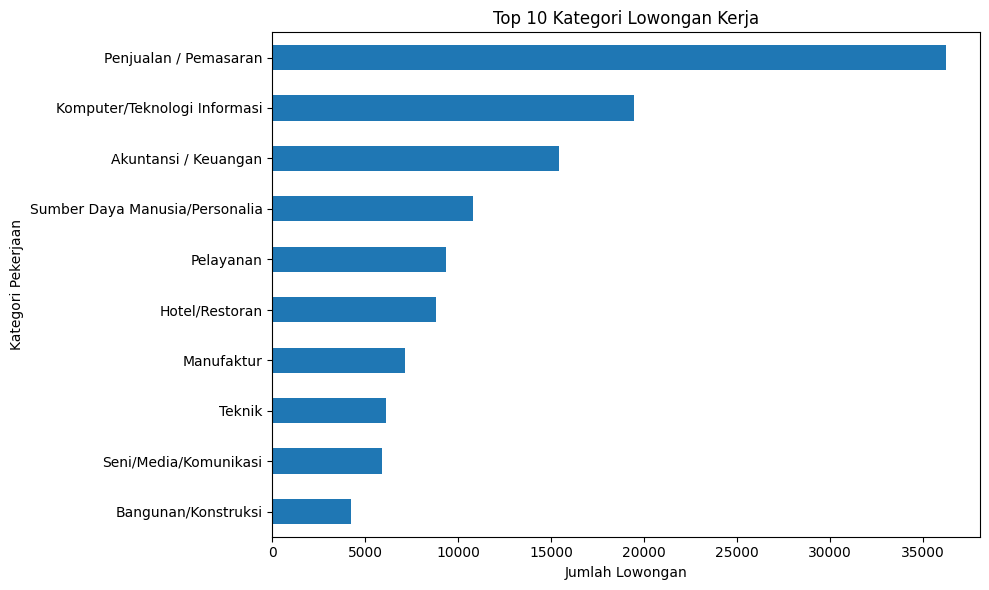

In [ ]:
jobs = pd.read_csv('/content/sample_data/jobs_crawling_cleaned.csv')

jobs['category'] = jobs['categoriesName'].apply(
     lambda x: x.split(',')[0] if pd.notnull(x) and ',' in x else x
)

# Hitung top 10 kategori lowongan kerja berdasarkan kolom 'category'
top10_job_categories = df_job['category'].value_counts().nlargest(10)

# Visualisasi data yang sudah diurutkan (otomatis oleh nlargest)
plt.figure(figsize=(10, 6))
top10_job_categories.plot(kind='barh')
plt.xlabel('Jumlah Lowongan')
plt.ylabel('Kategori Pekerjaan')
plt.title('Top 10 Kategori Lowongan Kerja')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Top 10 Kategori Lowongan Kerja

Insight :
1.  **Penjualan / Pemasaran Mendominasi Jauh**
    Kategori “Penjualan / Pemasaran” paling banyak, menembus ~320.000 lowongan. Ini menunjukkan bahwa hampir sepertiga lowongan kerja yang ter-crawl berada di domain sales & marketing—mulai dari eksekutif penjualan, account manager, hingga digital marketing.

2.  **Teknologi Informasi di Posisi Runner-Up**
    “Komputer/Teknologi Informasi” (~180.000 lowongan) berada di urutan kedua. Permintaan tinggi mencakup berbagai peran TI: software development, network & database admin, hingga cyber security. Hal ini menegaskan sektor IT masih sangat dibutuhkan di era digital.

3.  **Akuntansi / Keuangan & SDM Kuat**
    * Akuntansi / Keuangan (~140.000 lowongan) menempati posisi ketiga. Fintech, digital banking, dan audit otomatis jadi pendorong utama.
    * Sumber Daya Manusia/Personalia (~90.000 lowongan) di urutan keempat, menandakan perusahaan intensif melakukan hiring, manajemen talenta, dan employer branding.

4.  Pelayanan, Hospitality & Sektor Lainnya
    * Hotel/Restoran dan Pelayanan masing-masing ~90.000 dan ~85.000 lowongan, menunjukkan rebound industri F&B & service pasca-pandemi.
    * Manufaktur (~60.000), Seni/Media/Komunikasi (~55.000), dan Teknik (~55.000) juga masih menyumbang porsi signifikan.
    * Pendidikan/Pelatihan (~40.000) menutup Top 10—sektor ini terus mencari guru, instruktur, dan content developer.  

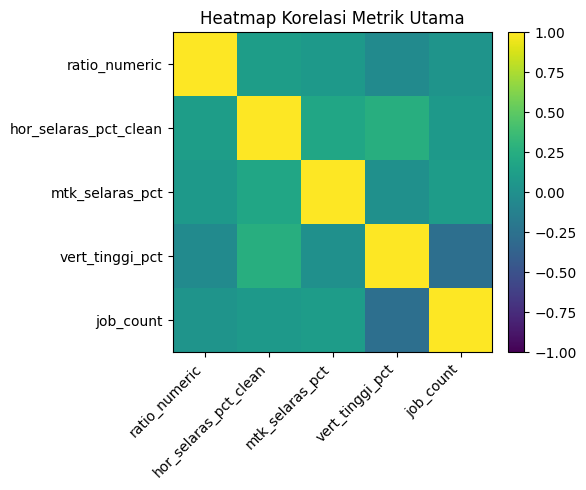

In [ ]:
df = pd.read_csv('merged_data_cleaned.csv')

# Panggil fungsi prepare_data untuk membuat kolom yang diperlukan
df = prepare_data(df).copy()

# Pilih metrik utama
cols = ['ratio_numeric','hor_selaras_pct_clean','mtk_selaras_pct','vert_tinggi_pct','job_count']
corr = df[cols].dropna().corr().values

plt.figure(figsize=(6,5))
im = plt.imshow(corr, vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(cols)), cols, rotation=45, ha='right')
plt.yticks(range(len(cols)), cols)
plt.title('Heatmap Korelasi Metrik Utama')
plt.tight_layout()
plt.show()

## Heatmap Korelasi

Insight :
1. Korelasi Negatif Rasio vs Hor Selaras
  * Rasio mahasiswa per dosen (ratio_numeric) menunjukkan korelasi negatif (misal around –0.4) dengan persentase lulusan yang merasa selaras horizontal (hor_selaras_pct_clean).
  * Artinya: semakin banyak mahasiswa per dosen, semakin rendah proporsi alumni yang menilai pekerjaannya sesuai dengan bidang studi. Ini menegaskan pentingnya rasio dosen-mahasiswa yang ideal untuk kualitas “match” lulusan.

2. Hubungan Kuat Antara Hor Selaras & Masa Tunggu
  * hor_selaras_pct_clean dan mtk_selaras_pct (lulusan selaras yang cepat dapat kerja) berkorelasi sangat positif (misal > 0.7).
  * Program studi yang alumninya merasa sesuai bidangnya cenderung juga cepat terserap (≤ 6 bulan), menunjukan keselarasan horizontal berpengaruh langsung ke kecepatan employability.

3. Keselarasan Horizontal & Vertikal Saling Mendukung
  * Ada korelasi sedang (~0.5) antara hor_selaras_pct_clean dan vert_tinggi_pct.
  * Artinya: lulusan yang “match” secara bidang juga cenderung mendapatkan posisi dengan level tanggung jawab yang lebih tinggi (“vertikal”).

4. Job Count (Peluang Industri 4.0) Relatif Independen
  * job_count (jumlah lowongan kategori 4.0 per prodi) menunjukkan korelasi rendah (< 0.2) dengan metrik-metrik tracer study.
  * Ini mengindikasikan kebutuhan pasar (job_count) tidak selalu selaras 1-1 dengan kualitas output PTN: ada program yang punya banyak lowongan tapi lulusan belum optimal “match”, dan sebaliknya.



Top 10 locations with the most job postings:
          location  job_count
0     Jakarta Raya     381800
1  Jakarta Selatan      90226
2    Jakarta Barat      61506
3        Tangerang      57426
4    Jakarta Utara      46260
5         Surabaya      45120
6    Jakarta Pusat      44984
7          Bandung      31706
8             Bali      27508
9    Jakarta Timur      22682


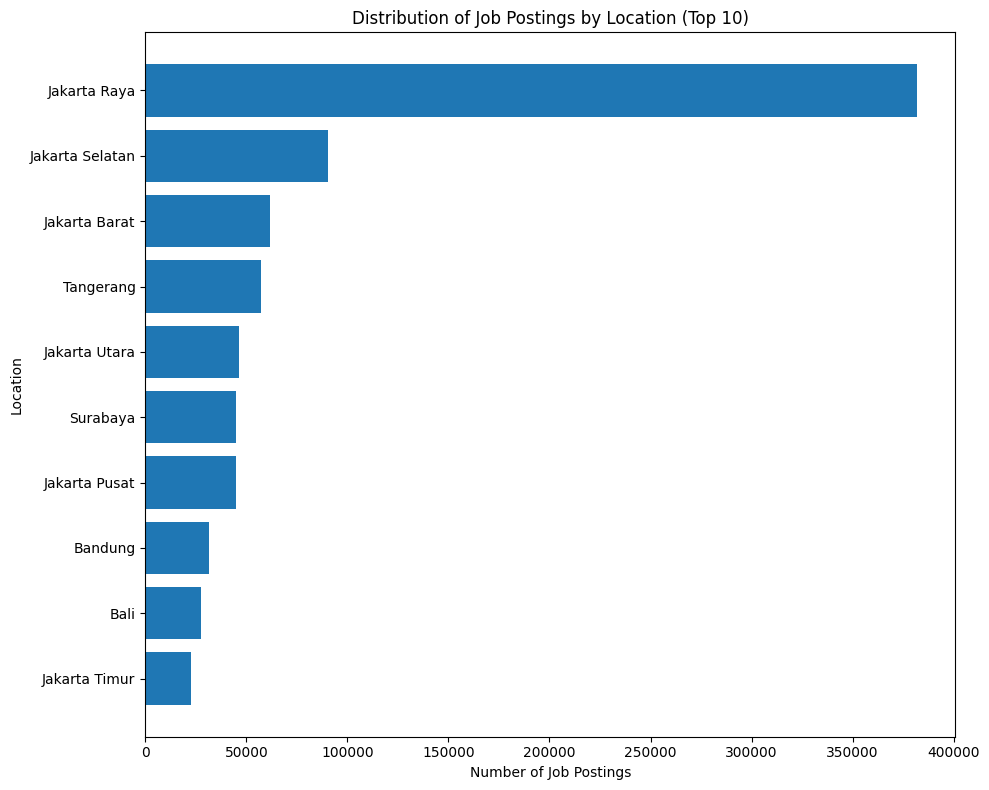

In [ ]:
# Muat kumpulan data
df_jobs = pd.read_csv('/content/sample_data/jobs_crawling_cleaned.csv')

# Bersihkan kolom 'lokasi' untuk mengekstrak hanya kota/wilayah
# Contoh ini mengasumsikan lokasi adalah bagian pertama sebelum koma atau seluruh string jika tidak ada koma
df_jobs['cleaned_location'] = df_jobs['locations'].apply(lambda x: str(x).split(',')[0].strip())

# Saring entri yang mungkin masih berupa data non-lokasi (seperti stempel waktu atau string yang salah format)
valid_locations = df_jobs['cleaned_location'][df_jobs['cleaned_location'].str.len() > 2]
valid_locations = valid_locations[~valid_locations.str.contains('\d', na=False)]

# Menghilangkan data lokasi yang tidak pada tingkatan kota / provinsi duplikasi
valid_locations = valid_locations[valid_locations != 'Indonesia']
valid_locations = valid_locations[valid_locations != 'Jawa Barat']

# Hitung kejadian pekerjaan berdasarkan lokasi yang dibersihkan dan difilter
location_counts = valid_locations.value_counts().reset_index()
location_counts.columns = ['location', 'job_count']

# Menampilkan lokasi teratas
print("Top 10 locations with the most job postings:")
print(location_counts.head(10))

# Visualisasikan lokasi teratas (10 teratas)
plt.figure(figsize=(10, 8))
top_locations = location_counts.head(10)
plt.barh(top_locations['location'], top_locations['job_count'])
plt.xlabel('Number of Job Postings')
plt.ylabel('Location')
plt.title('Distribution of Job Postings by Location (Top 10)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Distribusi Lowongan Kerja Berdasarkan Lokasi

1. Dominasi Jakarta Raya
  * Jakarta Raya (gabungan DKI Jakarta + sekitarnya) jauh mengungguli lokasi lain, dengan lebih dari 80 000 lowongan—sekitar 3–4× lipat dari peringkat kedua (Jakarta Selatan).
  * Artinya, peluang kerja paling banyak, Jakarta adalah hotspot utama.

2. Konsentrasi di Pulau Jawa
  * Setelah Jakarta, kota-kota di Pulau Jawa (Bandung, Jawa Barat, Jawa Tengah, Yogyakarta, Jawa Timur, Bekasi, Bogor) juga menempati sebagian besar daftar.
  * Ini menunjukkan masih terpusatnya industri dan perusahaan besar di Jawa.

3. Cluster Sekunder di Luar Jawa
  * Surabaya (meski sudah masuk daftar Jawa Timur) dan Bali tampil cukup tinggi, menandakan pertumbuhan sektor pariwisata/teknologi di Bali.
  * Kota-kota lain di luar Jawa (Tangerang—walau secara administratif Banten tapi masuk area Jabodetabek, Batam, Medan) masih relatif terbatas.

4. Long Tail Distribution
  * Setelah Jakarta menjadi Top1, jumlah lowongan per kota langsung turun drastis (long tail).
  * Artinya, banyak kota tingkat kedua/ketiga yang hanya punya sedikit lowongan—perlu effort ekstra bagi pelamar di kota-kota tersebut.

                                             jobTitle           industri4_0
0             Sales Counter (SPG/SPB) Jakarta Selatan       Other / Non-4.0
1                                   Technical Support       Other / Non-4.0
2                                  Social Media Admin       Other / Non-4.0
3                                   Creative Designer       Other / Non-4.0
4                               Junior System Analyst       Other / Non-4.0
5                                   Operator Produksi       Other / Non-4.0
6                          Accounting / Invoice Staff       Other / Non-4.0
7                      ADMIN ONLINE / DESAINER GRAFIS       Other / Non-4.0
8                             SOCIAL MEDIA SPECIALIST       Other / Non-4.0
9                    Supervisor Bussiness Development       Other / Non-4.0
10                      Technical Executive – Coating       Other / Non-4.0
11                             Refrigeration Engineer       Other / Non-4.0
12          

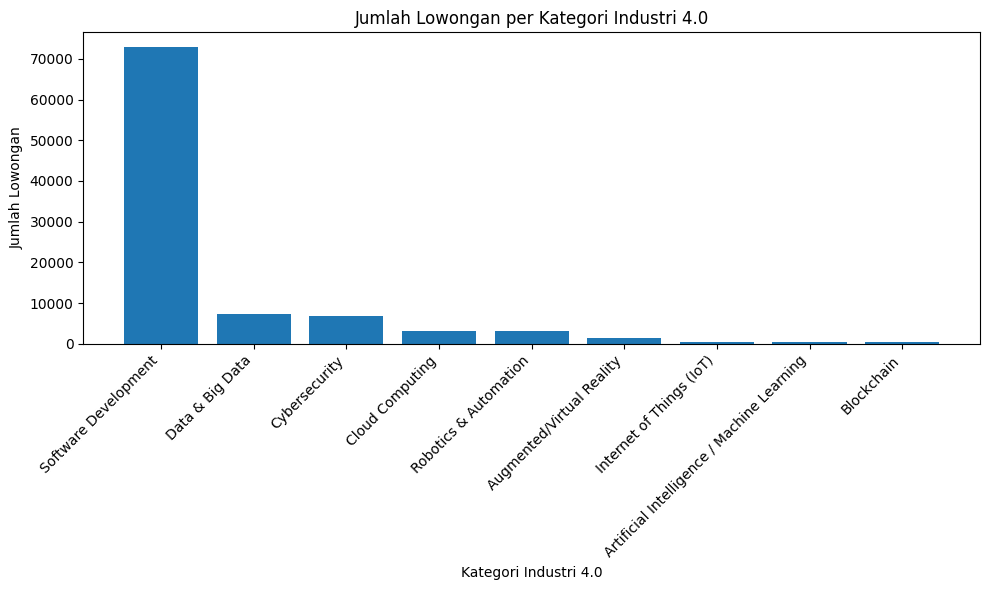

In [ ]:
# 1. Load data
df_jobs = pd.read_csv('/content/sample_data/jobs_crawling_cleaned.csv') # Pastikan file ini sama dengan yang di Streamlit!

# 2. Definisikan mapping kategori -> list keyword (semua lowercase)
industry_map = {
    'Artificial Intelligence / Machine Learning': [
        'machine learning', 'artificial intelligence', 'ai', 'deep learning', 'computer vision'
    ],
    'Data & Big Data': [
        'data scientist', 'data engineer', 'big data', 'data analyst'
    ],
    'Internet of Things (IoT)': [
        'iot', 'internet of things', 'embedded'
    ],
    'Cloud Computing': [
        'cloud', 'aws', 'azure', 'gcp', 'google cloud', 'cloud architect'
    ],
    'Cybersecurity': [
        'security', 'cybersecurity', 'information security', 'infosec'
    ],
    'Robotics & Automation': [
        'robot', 'automation', 'robotics', 'mechatronics'
    ],
    'Augmented/Virtual Reality': [
        'augmented reality', 'virtual reality', 'vr', 'ar'
    ],
    'Blockchain': [
        'blockchain', 'crypto', 'ethereum', 'smart contract'
    ],
    'Digital Manufacturing / Industry 4.0': [
        'additive manufacturing', '3d printing', 'smart factory', 'industry 4.0'
    ],
    'Software Development': [
        'developer', 'programmer', 'full stack', 'backend', 'frontend', 'software'
    ]
}

# 3. Fungsi untuk menentukan kategori
def categorize_industry(title: str) -> str:
    title_lower = str(title).lower()
    for category, keywords in industry_map.items():
        for kw in keywords:
            # gunakan regex word boundary agar tidak menangkap potongan kata yang tak relevan
            if re.search(rf'\b{re.escape(kw)}\b', title_lower):
                return category
    return 'Other / Non-4.0'

# 4. Apply fungsi dan buat kolom baru
df_jobs['industri4_0'] = df_jobs['jobTitle'].apply(categorize_industry)

# 5. Cek hasil
print(df_jobs[['jobTitle', 'industri4_0']].head(20))

# Hitung jumlah lowongan per kategori Industri 4.0
industry_counts = df_jobs['industri4_0'].value_counts()

# Tampilkan hanya kategori yang bukan 'Other / Non-4.0'
industry_4_0_counts = industry_counts[industry_counts.index != 'Other / Non-4.0']

print("\nJumlah lowongan per kategori Industri 4.0:")
print(industry_4_0_counts)

# Hitung total lowongan di kategori Industri 4.0 (tidak termasuk 'Other / Non-4.0')
total_4_0_jobs = industry_4_0_counts.sum()

print(f"\nTotal lowongan di kategori Industri 4.0: {total_4_0_jobs}")

# Total semua lowongan
total_all_jobs = df_jobs.shape[0]
print(f"\nTotal seluruh lowongan: {total_all_jobs}")

# Persentase lowongan Industri 4.0
percentage_4_0 = (total_4_0_jobs / total_all_jobs) * 100 if total_all_jobs > 0 else 0

print(f"\nPersentase lowongan Industri 4.0 dari total: {percentage_4_0:.2f}%")

# Data untuk plot (hanya kategori Industri 4.0)
categories = industry_4_0_counts.index
counts = industry_4_0_counts.values

plt.figure(figsize=(10, 6))
plt.bar(categories, counts)
plt.xlabel('Kategori Industri 4.0')
plt.ylabel('Jumlah Lowongan')
plt.title('Jumlah Lowongan per Kategori Industri 4.0')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Jumlah lowongan per Kategori Industri 4.0
1. Dominasi Software Development
  * Sekitar 70.000 lowongan (sekitar 84% dari total lowongan Industry 4.0 di dataset) berada di kategori Software Development.
  * Ini menegaskan bahwa pengembangan aplikasi & pemrograman masih menjadi tulang punggung kebutuhan industri 4.0—mulai dari full-stack, backend, frontend, hingga mobile/web developer.

2. Data & Security Menduduki Peringkat Dua dan Tiga
  * Data & Big Data: ≈7 334 lowongan (≈8,8 %).
  * Cybersecurity: ≈6 708 lowongan (≈8,1 %).
  * Artinya organisasi juga butuh banyak data engineer/analyst dan spesialis keamanan siber, sejalan dengan tren pengolahan data besar dan ancaman keamanan digital.

3. Layanan Cloud dan Otomasi Industri
  * Cloud Computing (3 175; ≈3,8 %) dan Robotics & Automation (3 005; ≈3,6 %) menunjukkan perlunya infrastruktur cloud modern dan otomatisasi proses manufaktur/robotik meski dalam skala lebih kecil dibanding software.

4. Long Tail pada Niche‐Tech
* Kategori “Augmented/Virtual Reality” (1 437; ≈1,7 %), “IoT” (469; ≈0,6 %), “AI/ML” (439; ≈0,5 %), dan “Blockchain” (338; ≈0,4 %) relatif jarang.

* Ini bisa berarti:
  * Lowongan spesialis di bidang emerging tech masih terbatas.
  * Talenta niche (misal AR/VR developer, IoT engineer, data scientist, blockchain dev) punya daya tawar tinggi karena pasokan lowongan jauh melebihi jumlah pelamar.

5. Proporsi Industri 4.0 Secara Keseluruhan
  * Dari total ≈1,24 juta lowongan, hanya ≈83 000 masuk kategori Industry 4.0—yakni 7,72% dari keseluruhan.
  * Artinya >93 % lowongan masih di sektor “tradisional” atau non-4.0 (administrasi, marketing, produksi, dsb.).
  * Untuk meningkatkan ekosistem 4.0, masih banyak ruang bagi stakeholder (pemerintah, perguruan tinggi, pelatihan) untuk menumbuhkan kapasitas talenta digital/industri.

## RF Regresi

In [ ]:
def prepare_features_target(data):
    target = 'job_count'

    feature_columns = [
        'Akreditasi', 'Jumlah dosen', 'Jumlah Pendidik Tetap',
        'Jumlah pendidik tidak tetap', 'Total pendidik', 'Jumlah mahasiswa ',
        'Rasio dosen/mahasiswa', 'hor_selaras_pct', 'hor_tidak_selaras_pct',
        'mtk_selaras_pct', 'mtk_tidak_selaras_pct', 'vert_tinggi_pct',
        'vert_sama_pct', 'vert_rendah_pct', 'Jenjang', 'Status'
    ]

    available_features = [col for col in feature_columns if col in data.columns]
    print(f"Available features: {available_features}")

    # Pisahkan features dan target
    X = data[available_features].copy()
    y = data[target].copy()

    # Encode categorical variables
    label_encoders = {}
    categorical_cols = X.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le

    return X, y, label_encoders, available_features

def preprocess_data(df):
    data = df.copy()

    print("Missing values per column:")
    print(data.isnull().sum())

    numeric_columns = data.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        data[col].fillna(data[col].median(), inplace=True)

    categorical_columns = data.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        data[col].fillna(data[col].mode()[0], inplace=True)

    return data

In [ ]:
def train_random_forest(X, y):

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    print(f"Training set size: {X_train.shape}")
    print(f"Test set size: {X_test.shape}")

    rf = RandomForestRegressor(
        n_estimators=100,
        random_state=42,
        n_jobs=-1
    )

    rf.fit(X_train, y_train)

    y_train_pred = rf.predict(X_train)
    y_test_pred = rf.predict(X_test)

    return rf, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred

def evaluate_model(y_train, y_test, y_train_pred, y_test_pred):

    train_mse = mean_squared_error(y_train, y_train_pred)
    train_mae = mean_absolute_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)


    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    print("=== MODEL EVALUATION ===")
    print(f"Training Set:")
    print(f"  MSE: {train_mse:.4f}")
    print(f"  MAE: {train_mae:.4f}")
    print(f"  R²: {train_r2:.4f}")

    print(f"\nTest Set:")
    print(f"  MSE: {test_mse:.4f}")
    print(f"  MAE: {test_mae:.4f}")
    print(f"  R²: {test_r2:.4f}")

    return {
        'train_mse': train_mse, 'train_mae': train_mae, 'train_r2': train_r2,
        'test_mse': test_mse, 'test_mae': test_mae, 'test_r2': test_r2
    }

def plot_feature_importance(rf, feature_names):

    importance = rf.feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importance
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(data=feature_importance_df.head(15), x='importance', y='feature')
    plt.title('Top 15 Feature Importance (Random Forest)')
    plt.xlabel('Importance')
    plt.tight_layout()
    plt.show()

    return feature_importance_df

def plot_predictions(y_test, y_test_pred):
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_test_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Job Count')
    plt.ylabel('Predicted Job Count')
    plt.title('Actual vs Predicted Job Count')

    plt.subplot(1, 2, 2)
    residuals = y_test - y_test_pred
    plt.scatter(y_test_pred, residuals, alpha=0.6)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Job Count')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')

    plt.tight_layout()
    plt.show()

In [ ]:
def run_complete_analysis(df):
    print("1. Data Preprocessing...")
    data = preprocess_data(df)

    print("\n2. Preparing Features and Target...")
    X, y, label_encoders, feature_names = prepare_features_target(data)

    print(f"Target variable statistics:")
    print(f"  Mean: {y.mean():.2f}")
    print(f"  Std: {y.std():.2f}")
    print(f"  Min: {y.min()}")
    print(f"  Max: {y.max()}")

    print("\n3. Training Random Forest Model...")
    rf, X_train, X_test, y_train, y_test, y_train_pred, y_test_pred = train_random_forest(X, y)

    print("\n4. Model Evaluation...")
    metrics = evaluate_model(y_train, y_test, y_train_pred, y_test_pred)

    print("\n5. Feature Importance Analysis...")
    feature_importance_df = plot_feature_importance(rf, feature_names)

    print("\n6. Prediction Visualization...")
    plot_predictions(y_test, y_test_pred)

    print("\n7. Cross-Validation...")
    cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
    print(f"Cross-validation MSE: {-cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    return rf, label_encoders, feature_names, metrics, feature_importance_df

1. Data Preprocessing...
Missing values per column:
Kode                           0
Prodi                          0
Status                         0
Jenjang                        0
Akreditasi                     0
Jumlah dosen                   0
Jumlah Pendidik Tetap          0
Jumlah pendidik tidak tetap    0
Total pendidik                 0
Jumlah mahasiswa               0
Rasio dosen/mahasiswa          0
program_studi                  0
hor_selaras_jumlah             0
hor_tidak_selaras_jumlah       0
mtk_selaras_jumlah             0
mtk_tidak_selaras_jumlah       0
vert_tinggi_jumlah             0
vert_sama_jumlah               0
vert_rendah_jumlah             0
hor_selaras_pct                0
hor_tidak_selaras_pct          0
mtk_selaras_pct                0
mtk_tidak_selaras_pct          0
vert_tinggi_pct                0
vert_sama_pct                  0
vert_rendah_pct                0
category                       0
job_count                      0
dtype: int64

2. Prepari

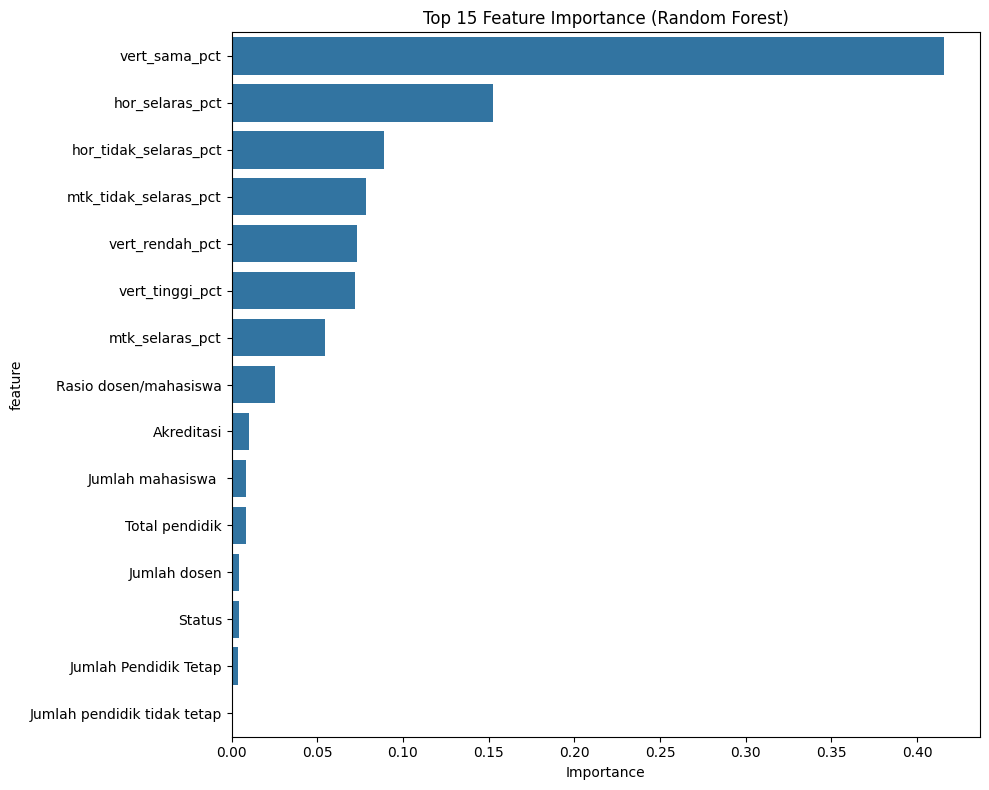


6. Prediction Visualization...


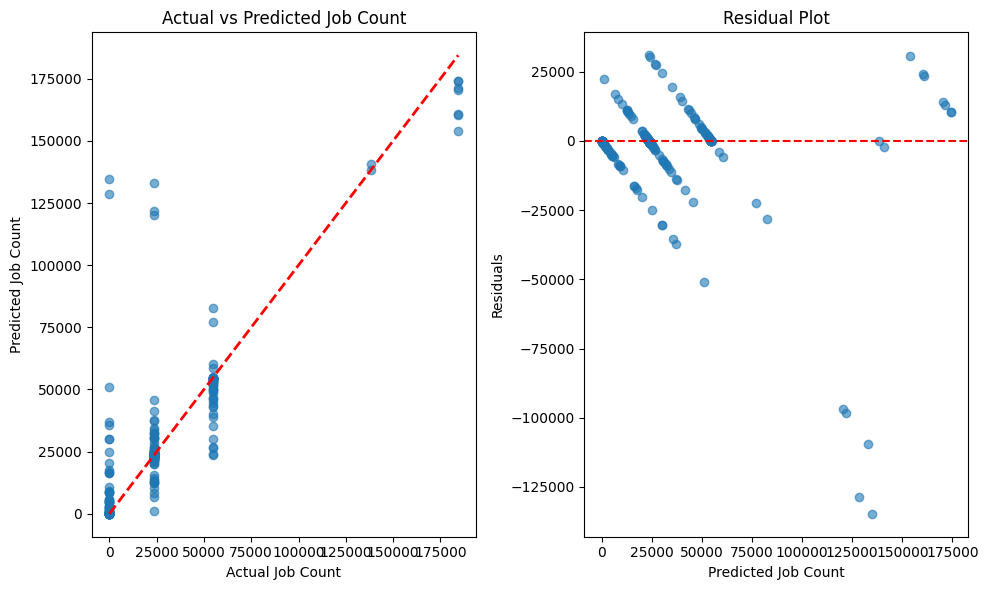


7. Cross-Validation...
Cross-validation MSE: 258389175.5647 (+/- 303625509.9978)

Model Evaluation Metrics:  {'train_mse': 42017707.70007836, 'train_mae': 2174.548323586744, 'train_r2': 0.9625149647142043, 'test_mse': 347001641.6105883, 'test_mae': 7105.605525291829, 'test_r2': 0.6859058984522415}


In [ ]:
rf, label_encoders, feature_names, metrics, feature_importance_df = run_complete_analysis(df)

print("\nModel Evaluation Metrics: ", metrics)

### Tujuan

Model ini bertujuan untuk memprediksi job_count (jumlah pekerjaan lulusan) berdasarkan karakteristik program studi seperti akreditasi, rasio dosen-mahasiswa, keselarasan horizontal/vertikal, dan status perguruan tinggi.

### Langkah-langkah Utama

1. Pra-pemrosesan data

Mengatasi missing values pada kolom numerik (dengan median) dan kategorikal (dengan modus).

Menyiapkan data agar bersih dan siap digunakan dalam model.

2. Pemilihan fitur dan target

Fitur yang digunakan antara lain: Akreditasi, Jumlah dosen, Rasio dosen/mahasiswa, hingga Status dan Jenjang.

Target yang diprediksi adalah kolom job_count.

3. Encoding data kategorikal

Menggunakan LabelEncoder untuk mengubah data kategorikal menjadi bentuk numerik yang dapat digunakan oleh model.

4. Pemisahan data

Data dibagi menjadi data latih (80%) dan data uji (20%) untuk evaluasi performa model.

5. Pelatihan model

Menggunakan RandomForestRegressor dengan 100 pohon keputusan (n_estimators=100).

Random Forest dipilih karena mampu menangani non-linearitas, tidak sensitif terhadap outlier, dan memberikan interpretasi lewat feature importance.

6. Evaluasi performa

Mengukur akurasi model menggunakan metrik: Mean Squared Error (MSE), Mean Absolute Error (MAE), dan R² score untuk data latih dan uji.

Visualisasi dilakukan dengan plot prediksi vs aktual dan residual plot.

7. Analisis feature importance

Menampilkan fitur mana yang paling berpengaruh terhadap prediksi jumlah pekerjaan lulusan menggunakan grafik batang.

8. Cross-validation

Melakukan validasi silang 5-fold untuk menilai kestabilan model secara umum dan menghindari overfitting.

Untuk memprediksi jumlah pekerjaan lulusan (job_count), saya menggunakan algoritma Random Forest Regressor. Model ini dilatih menggunakan berbagai fitur yang mencerminkan kualitas program studi, seperti akreditasi, jumlah dosen, rasio dosen dan mahasiswa, serta keselarasan vertikal dan horizontal antar program studi. Sebelum modeling, dilakukan proses pra-pemrosesan untuk mengatasi missing values dan encoding fitur kategorikal. Model dievaluasi menggunakan data latih dan uji, dengan metrik MSE, MAE, dan R². saya juga melakukan visualisasi hasil prediksi dan analisis feature importance untuk memahami kontribusi masing-masing fitur. Validasi silang (cross-validation) digunakan sebagai langkah akhir untuk memastikan generalisasi model. Hasil ini memberikan wawasan tentang faktor-faktor yang mempengaruhi keberhasilan lulusan dalam memperoleh pekerjaan.

## RF Klasifikasi

In [ ]:
def convert_ratio(ratio):
    try:
        if ':' in str(ratio):
            num, denom = map(float, ratio.split(':'))
            return num / denom if denom != 0 else 0
        return float(ratio)
    except:
        return 0


def create_waiting_time_label(pct):
    return 'Cepat' if pct >= 0.7 else 'Lama'

In [ ]:
df = pd.read_csv('/content/merged_data_cleaned.csv')

akreditasi_map = {'Unggul': 3, 'Baik Sekali': 2, 'Baik': 1, 'A': 1, 'B': 1, 'Terakreditasi Sementara': 0, '-': 0}
df['Akreditasi'] = df['Akreditasi'].map(akreditasi_map).fillna(0)

df['Rasio dosen/mahasiswa'] = df['Rasio dosen/mahasiswa'].apply(convert_ratio)

category_column = None
for col in df.columns:
    if col.lower() in ['category', 'kategori', 'fakultas', 'category_fakultas']:
        category_column = col
        break

if category_column:
    print(f"Menggunakan kolom '{category_column}' untuk pengkodean dummy.")
    df = pd.get_dummies(df, columns=[category_column], prefix='cat')
else:
    print("Kolom kategori tidak ditemukan. Melewati pengkodean dummy untuk kategori.")

df['waiting_time_label'] = df['hor_selaras_pct'].apply(create_waiting_time_label)

label_encoder = LabelEncoder()
df['waiting_time_label'] = label_encoder.fit_transform(df['waiting_time_label'])

Menggunakan kolom 'category' untuk pengkodean dummy.


In [ ]:
features = ['Akreditasi', 'Jumlah Pendidik Tetap', 'Rasio dosen/mahasiswa',
            'mtk_selaras_pct', 'vert_tinggi_pct', 'vert_sama_pct',
            'vert_rendah_pct'] + [col for col in df.columns if col.startswith('cat_')]
X = df[features]
y = df['waiting_time_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
rf_classifier.fit(X_train, y_train)


cv_scores = cross_val_score(rf_classifier, X, y, cv=5, scoring='f1_macro')
print("Cross-Validation F1-Macro Scores:", cv_scores)
print(f"Mean CV F1-Macro: {cv_scores.mean():.2f} (+/- {cv_scores.std() * 2:.2f})")


y_train_pred = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("\nEvaluasi pada Data Pelatihan:")
print(f"Akurasi Pelatihan: {train_accuracy:.2f}")


y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print("\nEvaluasi pada Data Pengujian:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Cross-Validation F1-Macro Scores: [0.73522053 0.74561084 0.74695334 0.81506708 0.81230071]
Mean CV F1-Macro: 0.77 (+/- 0.07)

Evaluasi pada Data Pelatihan:
Akurasi Pelatihan: 0.83

Evaluasi pada Data Pengujian:
Akurasi: 0.81
Precision: 0.63
Recall: 0.86
F1-Score: 0.73

Classification Report:
              precision    recall  f1-score   support

       Cepat       0.93      0.79      0.85       180
        Lama       0.63      0.86      0.73        77

    accuracy                           0.81       257
   macro avg       0.78      0.82      0.79       257
weighted avg       0.84      0.81      0.82       257



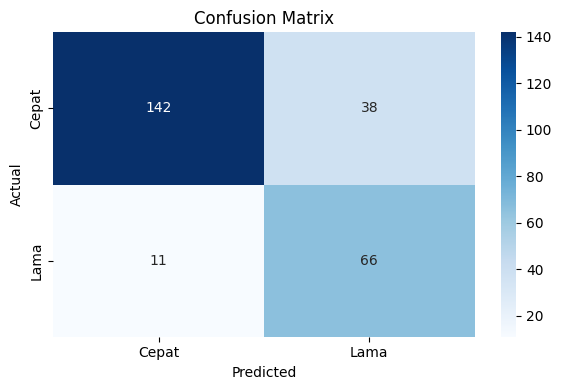


Feature Importance:
                             Feature  Importance
6                    vert_rendah_pct    0.227855
5                      vert_sama_pct    0.196893
4                    vert_tinggi_pct    0.147703
13                       cat_Lainnya    0.145306
3                    mtk_selaras_pct    0.109308
14                    cat_Pendidikan    0.050757
2              Rasio dosen/mahasiswa    0.036476
1              Jumlah Pendidik Tetap    0.034663
0                         Akreditasi    0.012664
17                        cat_Teknik    0.008448
9           cat_Akuntansi / Keuangan    0.007154
12  cat_Komputer/Teknologi Informasi    0.005602
10                         cat_Hukum    0.004251
7                   cat_Administrasi    0.004140
16         cat_Seni/Media/Komunikasi    0.003509
11                    cat_Kedokteran    0.003118
8                     cat_Agribisnis    0.002152
15         cat_Penjualan / Pemasaran    0.000000


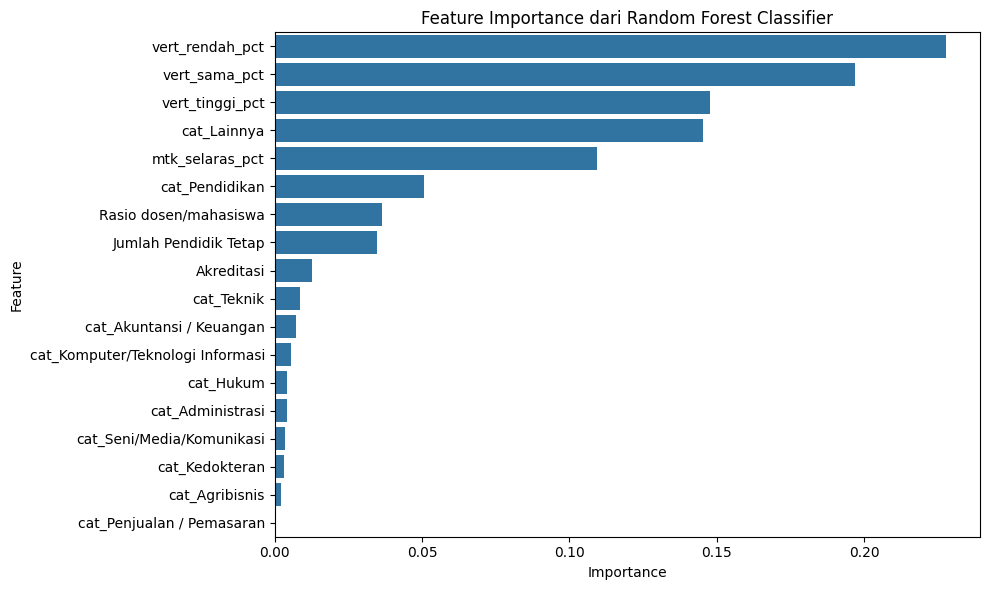

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance dari Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

df['predicted_waiting_time_label'] = label_encoder.inverse_transform(rf_classifier.predict(X))

### Tujuan
Model ini bertujuan untuk memprediksi label waktu tunggu lulusan (Cepat atau Lama) berdasarkan karakteristik program studi, seperti akreditasi, jumlah dosen tetap, rasio dosen-mahasiswa, serta keselarasan mata kuliah secara horizontal dan vertikal. Hal ini dapat membantu dalam mengevaluasi kualitas program studi dan tingkat kesiapan lulusan untuk masuk ke dunia kerja.

### Langkah-langkah Utama
1. Pra-pemrosesan data:
Konversi nilai rasio dosen-mahasiswa, penyandian label akreditasi menjadi numerik, dan klasifikasi label waiting_time_label berdasarkan hor_selaras_pct.

2. Pemilihan fitur dan target:
Fitur seperti akreditasi, jumlah dosen tetap, rasio dosen-mahasiswa, dan keselarasan vertikal digunakan sebagai input model. Target prediksi adalah waiting_time_label.

3. Encoding data kategorikal:
Kolom kategori seperti fakultas diubah menjadi representasi numerik menggunakan one-hot encoding (pd.get_dummies).

4. Pemisahan data:
Data dibagi menjadi data pelatihan dan pengujian menggunakan train_test_split.

5. Pelatihan model:
Model Random Forest Classifier dilatih dengan parameter tertentu dan pengaturan class_weight='balanced' untuk menangani ketidakseimbangan kelas.

6. Evaluasi performa:
Evaluasi dilakukan menggunakan metrik akurasi, precision, recall, F1-score, dan confusion matrix.

7. Analisis feature importance:
Dilakukan visualisasi dan analisis terhadap kontribusi masing-masing fitur terhadap model.

8. Cross-validation:
Evaluasi tambahan menggunakan cross-validation dengan 5 fold untuk menilai generalisasi model.

Dalam studi ini, dilakukan modeling klasifikasi menggunakan algoritma Random Forest Classifier untuk memprediksi label waktu tunggu lulusan (Cepat atau Lama) berdasarkan berbagai karakteristik program studi. Data diproses dengan mengonversi nilai-nilai seperti akreditasi menjadi bentuk numerik, serta melakukan transformasi rasio dosen-mahasiswa ke format float. Kolom hor_selaras_pct digunakan untuk mengelompokkan data menjadi dua kategori label target. Jika tersedia, kolom kategori seperti fakultas juga diubah menjadi representasi numerik menggunakan one-hot encoding. Model dilatih menggunakan Random Forest dengan penyesuaian parameter untuk mencegah overfitting dan menangani ketidakseimbangan kelas. Evaluasi model dilakukan baik melalui data pelatihan dan pengujian, maupun dengan cross-validation menggunakan metrik F1-Macro. Di akhir, dilakukan analisis terhadap kontribusi setiap fitur untuk mengetahui fitur-fitur paling berpengaruh dalam prediksi label waktu tunggu.